## Урок 3. TensorFlow

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
# Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

train_images = train_images / 255.0
test_images = test_images / 255.0

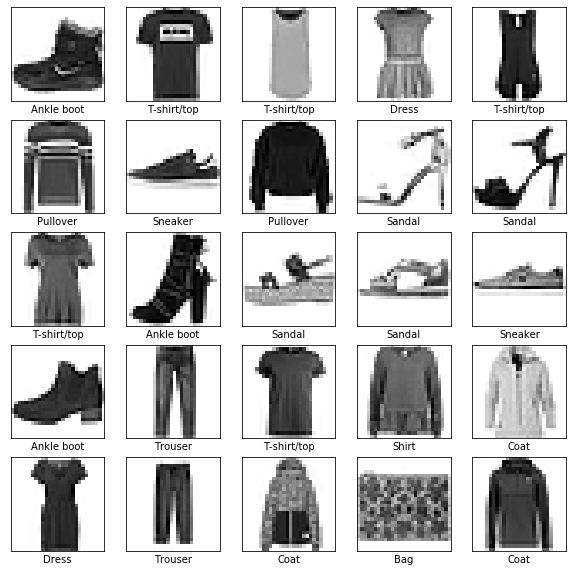

In [11]:
# Посмотрим первые 25 изображений:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# Определение слоев

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
# Компиляция модели

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4997 - accuracy: 0.8236
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8644
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3349 - accuracy: 0.8778


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3548 - accuracy: 0.8703

Test accuracy: 0.8702999949455261


### Практическое задание

**1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?**

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=8)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4809 - accuracy: 0.8293
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3626 - accuracy: 0.8666
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3249 - accuracy: 0.8819
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3027 - accuracy: 0.8886
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2827 - accuracy: 0.8954
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2686 - accuracy: 0.9005
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2566 - accuracy: 0.9039
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2444 - accuracy: 0.9083
313/313 - 1s - loss: 0.3388 - accuracy: 0.8859

Test accuracy: 0.8859000205993652


In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=8)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4894 - accuracy: 0.8239
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3645 - accuracy: 0.8664
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3286 - accuracy: 0.8796
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3076 - accuracy: 0.8872
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2889 - accuracy: 0.8934
Epoch 6/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2750 - accuracy: 0.8975
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2607 - accuracy: 0.9016
Epoch 8/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2520 - accuracy: 0.9057
313/313 - 1s - loss: 0.3159 - accuracy: 0.8893

Test accuracy: 0.8892999887466431


In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=8)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4758 - accuracy: 0.8277
Epoch 2/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3493 - accuracy: 0.8700
Epoch 3/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3168 - accuracy: 0.8829
Epoch 4/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2958 - accuracy: 0.8896
Epoch 5/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2797 - accuracy: 0.8951
Epoch 6/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2646 - accuracy: 0.8993
Epoch 7/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2528 - accuracy: 0.9057
Epoch 8/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2431 - accuracy: 0.9076
313/313 - 1s - loss: 0.3168 - accuracy: 0.8905

Test accuracy: 0.890500009059906


**Итого:  
как и в дз из предыдущего урока, максимальную точность почти 89% удалось получить за счет увеличения количества внутренних слоев нейросети и числа нейронов в них(по "пирамидальной схеме"), а также увеличения количества эпох (все изменения "без фанатизма", чтобы не тратить слишком много времени на обучение). Пробовал также разные функции активации и оптимайзеры, но какого-то ощутимого прироста точности это не дало.**

**2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке**

In [43]:
# саммари модели
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_86 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_87 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_88 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [45]:
# подробная информация о слоях
model.get_config()

{'name': 'sequential_26',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_27_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_27',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_85',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_86',
    'trainable': True,
    'dtype': 'float32',
 

In [47]:
# веса модели
model.get_weights()

[array([[ 0.03324796, -0.03581205, -0.07354512, ..., -0.07549746,
          0.04568478, -0.00467996],
        [ 0.04136962, -0.01326155, -0.00854557, ..., -0.01555777,
          0.03158664, -0.03765024],
        [ 0.00060399,  0.02128129,  0.05183231, ...,  0.03867203,
         -0.07281866, -0.00371775],
        ...,
        [ 0.02835782,  0.03417222,  0.06897821, ..., -0.02818815,
         -0.04236594,  0.00317525],
        [ 0.02463128,  0.01106543, -0.04079632, ...,  0.05513575,
         -0.01074572, -0.05454814],
        [ 0.01095362,  0.03512948,  0.06708584, ...,  0.02251342,
         -0.00241451, -0.02270138]], dtype=float32),
 array([ 5.92445815e-03,  8.67409538e-03,  3.45967081e-03,  6.42918656e-03,
         1.79764675e-03, -2.14285520e-03,  9.23724938e-03,  1.03314333e-02,
         5.18000638e-03, -3.13561817e-04, -1.96154322e-03, -2.94999382e-03,
        -9.93295806e-04,  7.84231001e-04,  1.02602842e-03,  7.17119547e-03,
         6.57568639e-03, -2.05809041e-03,  9.13396105e

In [86]:
# информация о функции потерь
model.loss.get_config()

{'reduction': 'auto',
 'name': 'sparse_categorical_crossentropy',
 'from_logits': True}

In [102]:
# информация об оптимизаторе
model.optimizer.get_config()

{'name': 'Adadelta',
 'learning_rate': 0.001,
 'decay': 0.0,
 'rho': 0.95,
 'epsilon': 1e-07}

In [110]:
# Настраиваемый атрибут, указывающий, должна ли модель работать быстро.
model.run_eagerly

False

***3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?**

Это набор данных из 25000 обзоров фильмов от IMDB, сгруппированных по настроениям (положительные / отрицательные). Обзоры были предварительно обработаны, и каждый отзыв закодирован в виде списка индексов слов (целых чисел). Для удобства слова индексируются по общей частоте в наборе данных, так что, например, целое число «3» кодирует третье по частоте слово в данных. Это позволяет выполнять такие операции быстрой фильтрации, как: «рассматривать только 10 000 самых распространенных слов, но исключать 20 самых употребительных слов».

In [184]:
#!pip install tensorflow_datasets
#!pip install tensorflow_hub

In [188]:
train_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=['train', 'test'])

In [197]:
train_labels_batch

'text'

In [132]:
# This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative).
imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [133]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [134]:
y_train.shape, y_test.shape

((25000,), (25000,))

In [165]:
data = np.concatenate((x_train, x_test), axis=0)
data.shape

(50000,)

In [163]:
print(len(np.unique(np.hstack(data))))

88585


In [154]:
np.array(np.unique(y_train))

array([0, 1])

In [146]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [147]:
print(y_train[0])

1


In [173]:
y_train_ = np.asarray(y_train)
x_train_ = np.asarray(x_train)

In [174]:
y_test_ = np.asarray(y_test)
x_test_ = np.asarray(x_test)

In [175]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(88585, )),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_, y_train_, epochs=8)

test_loss, test_acc = model.evaluate(x_test_,  y_test_, verbose=2)

print('\nTest accuracy:', test_acc)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).